In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

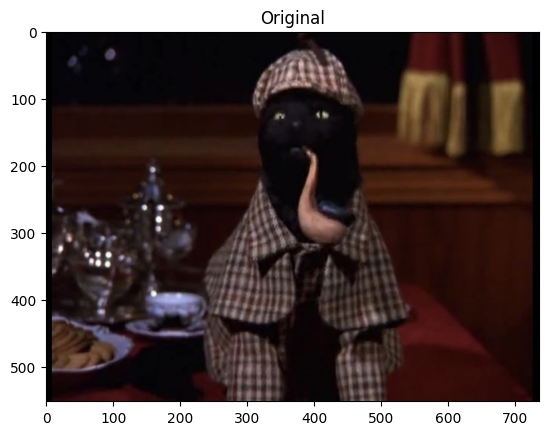

In [29]:
image = cv2.imread('images/img5.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original')
plt.show()

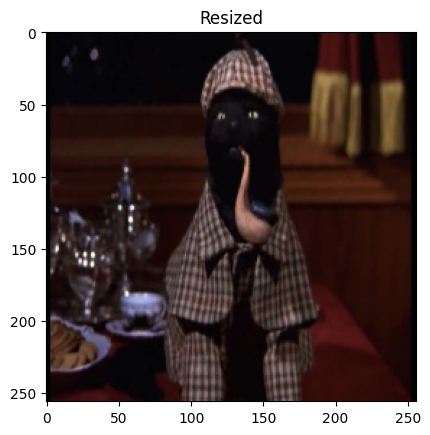

In [30]:
# Изменение размера изображения
resized_image = cv2.resize(image_rgb, (256, 256))

plt.imshow(resized_image)
plt.title('Resized')
plt.show()

(192, 256, 3)


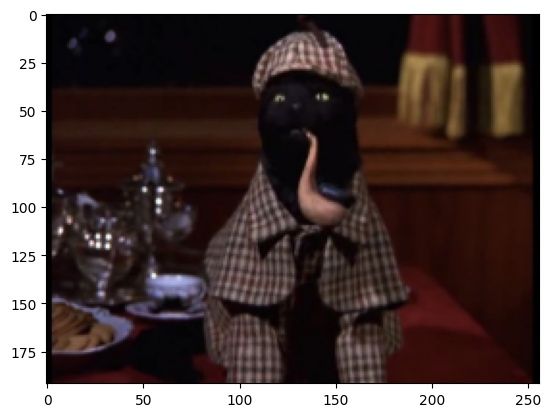

In [78]:
# с сохрвнением пропорций
desired_width = 256

aspect_ratio = desired_width / image_rgb.shape[1] # соотношение сторон: ширина, делённая на ширину оригинала
desired_height = int(image_rgb.shape[0] * aspect_ratio) # желаемая высота: высота, умноженная на соотношение сторон
dim = (desired_width, desired_height)  # итоговые размеры

resized_cropped_region = cv2.resize(image_rgb, dsize=dim, interpolation=cv2.INTER_AREA)
print(resized_cropped_region.shape)
plt.imshow(resized_cropped_region)
plt.show()

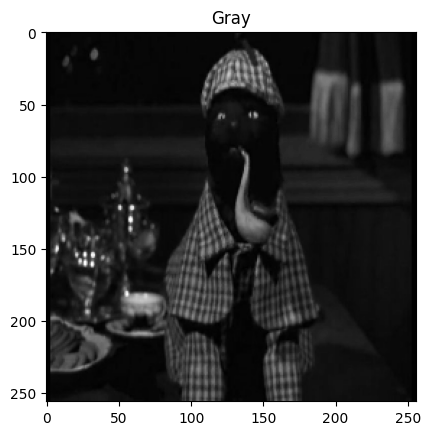

In [31]:
# Преобразование в оттенки серого
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray")
plt.title('Gray')
plt.show()

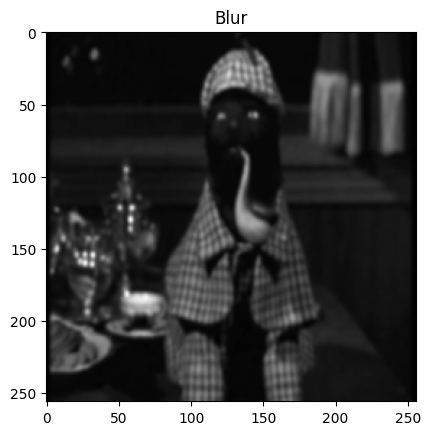

In [10]:
# Размытие изображения (Gaussian Blur)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.imshow(blurred_image, cmap="gray")
plt.title('Blur')
plt.show()

#### Обнаружение контуров

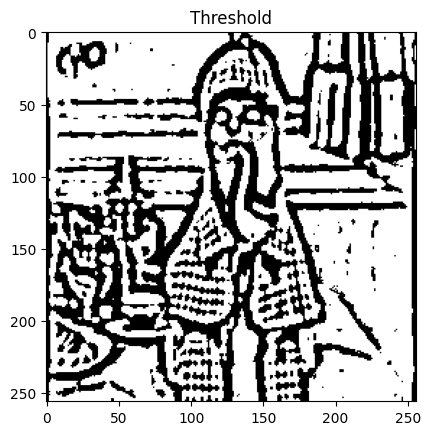

In [11]:
# Повышение контрастности (Adaptive Thresholding)
thresholded_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresholded_image, cmap="gray")
plt.title('Threshold')
plt.show()

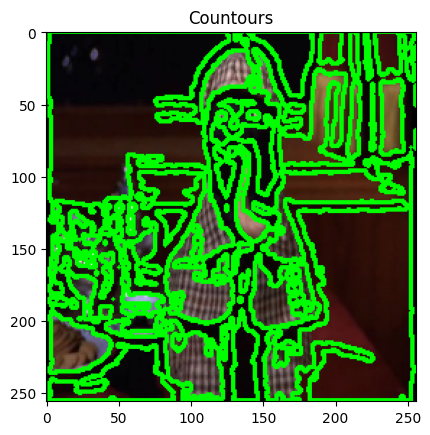

In [13]:
# Отрисовка контуров (Contours)
contours, hierarchy = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_img = cv2.drawContours(resized_image, contours, -1, (0, 255, 0), 2)

plt.imshow(contours_img)
plt.title('Countours')
plt.show()

#### Обнаружение краев с помощью алгоритма Canny

Алгоритм Canny является одним из самых популярных методов обнаружения краев благодаря своей точности и эффективности. Он использует несколько этапов:
1. Размытие (сглаживание) изображения, чтобы убрать лишние детали, которые могут мешать увидеть края.
2. Вычисление градиентов, то есть направление и силу изменения яркости
3. Применение порогововых значений (в результате выбираем все граничные точки, которые находятся выше верхнего порога t1, а затем исследуем, существуют ли соседи этих точек, которые рассматриваются ниже верхнего порога t1 и выше нижнего порога t2. В этом случае такие соседи будут частью края)


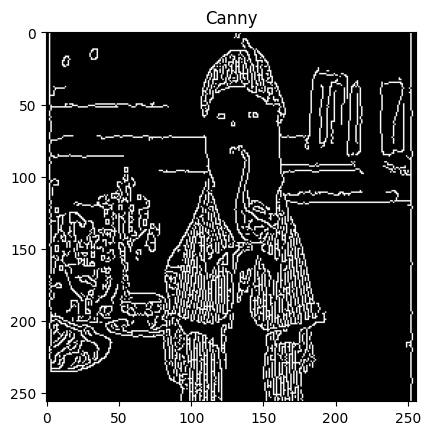

In [44]:
edges = cv2.Canny(gray_image, 100, 5)

plt.imshow(edges, cmap="gray")
plt.title('Canny')
plt.show()

In [45]:
edges.shape

(256, 256)

In [46]:
edges # 0 - black, 1 - white

array([[  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       [  0,   0, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

#### Отражение картинки

Text(0.5, 1.0, 'Original')

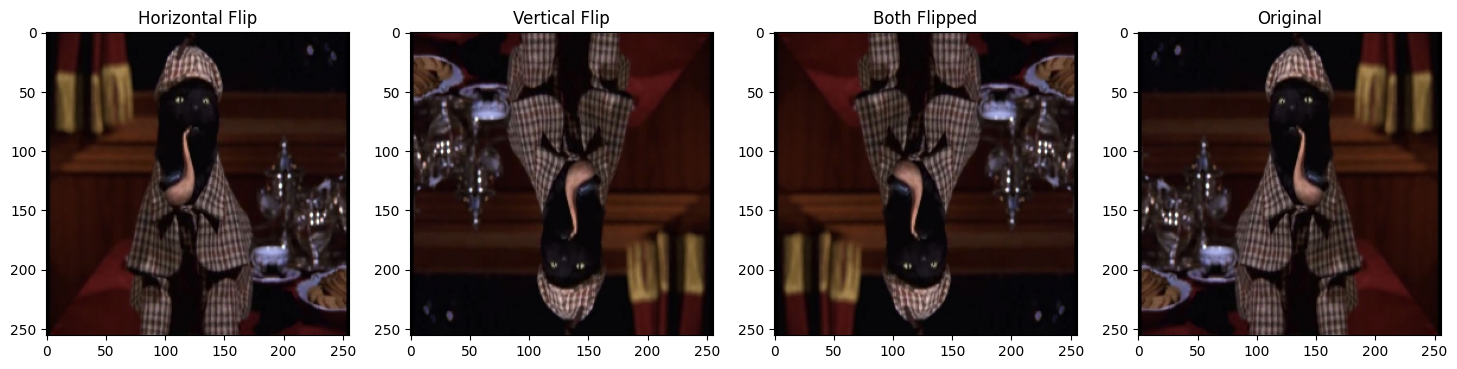

In [80]:
img_NZ_rgb_flipped_horz = cv2.flip(resized_image, 1)
img_NZ_rgb_flipped_vert = cv2.flip(resized_image, 0)
img_NZ_rgb_flipped_both = cv2.flip(resized_image, -1)

plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped")
plt.subplot(144);plt.imshow(resized_image);plt.title("Original")

#### Перевод в иные цветовые пространства

Выше уже использовался перевод BGR в RGB и в серый

cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

##### Преобразование в HSV

HSV  —  Hue, Saturation, Value — тон, насыщенность, значение

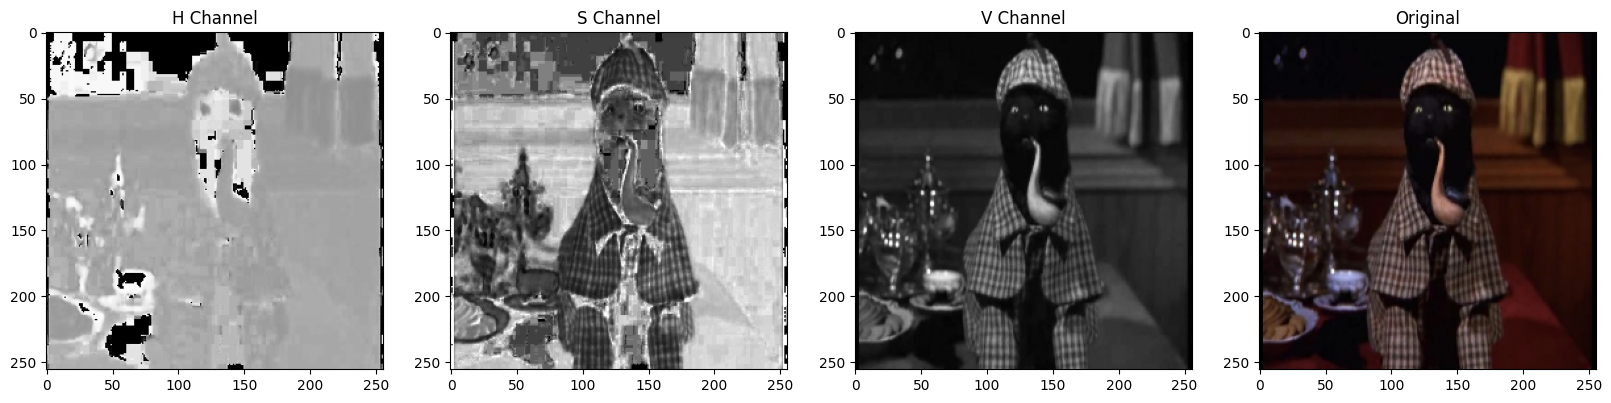

In [81]:
img_hsv = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)
# Разобъём картинку на H,S,V каналы
h,s,v = cv2.split(img_hsv)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel")
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel")
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel")
plt.subplot(144);plt.imshow(resized_image);plt.title("Original")

plt.show()

##### Модификация отдельного канала

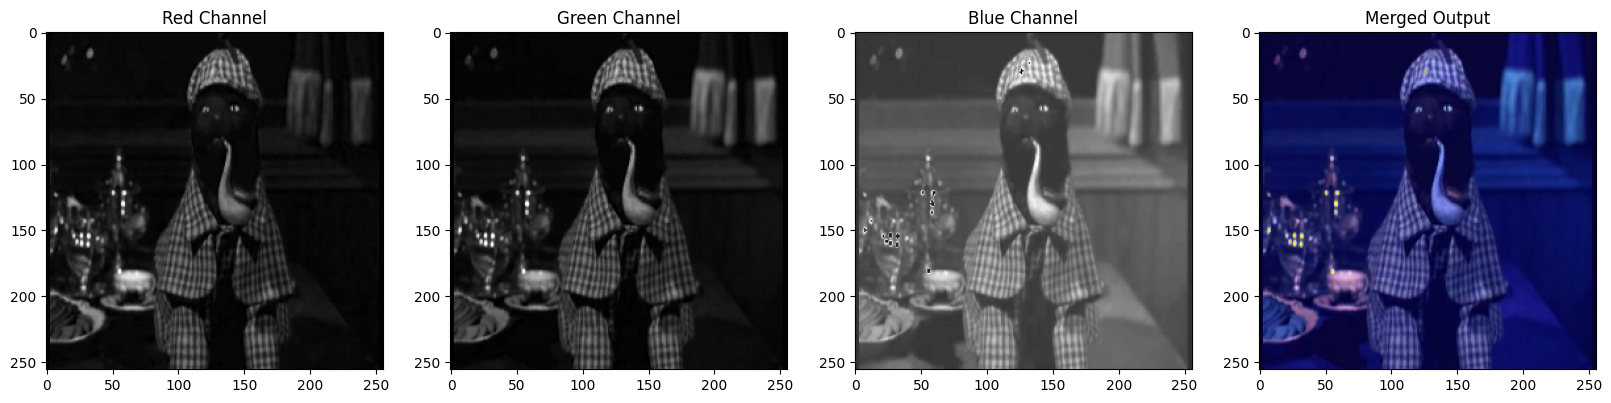

In [84]:
b,g,r = cv2.split(resized_image)

b = b+50  # осиняем

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel")
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel")
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel")

imgMerged = cv2.merge((r,g,b))
plt.subplot(144);plt.imshow(imgMerged);plt.title("Merged Output")

plt.show()

#### Распознавание лиц

Распознавание лиц — одна из самых популярных задач в компьютерном зрении. OpenCV предоставляет готовые каскады Хаара для этой задачи.
Каскады Хаара — это предварительно обученные модели, которые могут эффективно обнаруживать лица на изображениях. Они работают путем сканирования изображения на наличие определенных паттернов, что делает их быстрыми и точными для задач распознавания лиц.

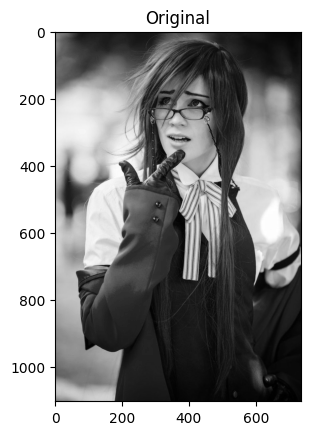

In [85]:
image_face = cv2.imread('images/img_faces.jpg')
image_face_rgb = cv2.cvtColor(image_face, cv2.COLOR_BGR2RGB)
gray_face_image = cv2.cvtColor(image_face_rgb, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_face_image, cmap="gray")
plt.title('Original')
plt.show()

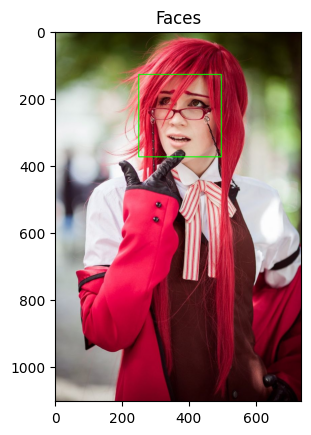

In [86]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_face_image, scaleFactor=1.1, minNeighbors=5)

for (x, y, w, h) in faces:
    cv2.rectangle(image_face_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image_face_rgb)
plt.title('Faces')
plt.show()